# Setup

In [35]:
# Imports
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Create connection
cnx = sqlite3.connect('yeast.sqlite')
cursor = cnx.cursor()

In [37]:
# Check tables
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tables = cursor.fetchall()
for table in tables:
    print(table[0])

sqlite_sequence
Genes
locations
Molecular
Bioprocess
Member
Treatment
Description
Relation
Expression


In [38]:
# sqlite -> dataframe -> csv
for table in tables:
    table_name = table[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
    df.to_csv(f"{table_name}.csv", index=False)
cnx.close()

# Read CSVs and Convert to Dataframes

In [39]:
bioprocess = pd.read_csv("Bioprocess.csv").set_index("id")
bioprocess.index.name = "bioprocess_id"
bioprocess

,process
bioprocess_id,
1,protein ion
2,transport ion
3,negative regulation ion repair
4,repair ion
5,negative regulation ion
...,...
1395,protein catabolic process ion positive
1402,protein transport ion
1415,regulation protein ion catabolic process


In [40]:
description = pd.read_csv("Description.csv").set_index("id")
description.index.name = "meaning_id"
description

,meaning
meaning_id,
1,wildtype wildtype 1
2,wildtype wildtype 2
3,itc1 itc1-1_dUTP
5,swr1 swr1 mutant
7,tet-STH1 <not provided>
9,tet-INO80 tet-ino80
11,tet-control strain tet-control
13,Strain5 phenol lysis
15,Strain6 phenol lysis


In [41]:
expression = pd.read_csv("expression.csv")
expression.index.name = "id"
expression

,gene_id,transcripts,treatment_id,location_id,meaning_id,function_id,bioprocess_id
id,,,,,,,
0,1,7.379174,40,1,40,1,1
1,1,5.858715,68,1,68,1,1
2,1,12.130323,50,1,50,1,1
3,1,12.679748,46,1,46,1,1
4,1,11.276427,55,1,54,1,1
...,...,...,...,...,...,...,...
33667,1464,69.615806,60,2,60,1,49
33668,1464,19.694546,78,2,76,1,49
33669,1464,61.062925,51,2,51,1,49


In [42]:
genes = pd.read_csv("Genes.csv").set_index("id")
genes.index.name = "gene_id"
genes

,name
gene_id,
1,YGR131W
2,YNL003C
3,YBR160W
4,YOL034W
5,YBL008W
...,...
1460,YMR212C
1461,YNL313C
1462,YEL006W


In [43]:
locations = pd.read_csv("locations.csv").set_index("id")
locations.index.name = "location_id"
locations

,location
location_id,
1,membrane
2,mitochond
3,nucle
18,cytoplasm
22,cytosol
41,endoplasm
121,extracellular


In [44]:
member = pd.read_csv("member.csv")
member.index.name = "id"
member

,gene_id,location_id,function_id,bioprocess_id
id,,,,
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,3,4,4
4,5,3,5,5
...,...,...,...,...
1459,1460,1,1,1
1460,1461,3,1,10
1461,1462,1,14,9


In [45]:
molecular = pd.read_csv("Molecular.csv").set_index("id")
molecular.index.name = "function_id"
molecular

,function
function_id,
1,molecular_function
2,transmembrane
3,RNA polymerase
4,damage
5,transcription
6,receptor
8,exonuclease activity
10,dehydrogenase
13,ATP


In [46]:
relation = pd.read_csv("Relation.csv").set_index("condition_id")
relation

,meaning_id
condition_id,
1,1
2,2
3,3
4,3
5,5
...,...
87,84
88,88
89,80


In [47]:
treatment = pd.read_csv("Treatment.csv").set_index("id")
treatment.index.name = "treatment_id"
treatment

,condition
treatment_id,
1,AFIQCI
2,AFIQBR
3,AFIINC
4,AFNAQI
5,AFNCCR
...,...
87,SAABQS
88,SAABIC
89,SAABIB


# Expression and Member are the Main Tables, so Join to Them

In [48]:
# Joining tables to expression table
joined_expression = expression.copy()

joined_expression = joined_expression.join(genes, on='gene_id').drop("gene_id", axis = 1)
joined_expression = joined_expression.rename(columns = {"name": "gene"})

joined_expression = joined_expression.join(locations, on='location_id').drop("location_id", axis = 1)

joined_expression = joined_expression.join(treatment, on='treatment_id').drop("treatment_id", axis = 1)
joined_expression = joined_expression.rename(columns = {"condition": "treatment"})

joined_expression = joined_expression.join(description, on='meaning_id').drop("meaning_id", axis = 1)
joined_expression = joined_expression.rename(columns = {"meaning": "description"})

joined_expression = joined_expression.join(molecular, on='function_id').drop("function_id", axis = 1)
joined_expression = joined_expression.rename(columns = {"function": "molecular_function"})

joined_expression = joined_expression.join(bioprocess, on='bioprocess_id').drop("bioprocess_id", axis = 1)
joined_expression = joined_expression.rename(columns = {"process": "bioprocess"})

joined_expression

,transcripts,gene,location,treatment,description,molecular_function,bioprocess
id,,,,,,,
0,7.379174,YGR131W,membrane,IFFABF,E1B1 ethanol,molecular_function,protein ion
1,5.858715,YGR131W,membrane,SAASCC,pbs2 galactose,molecular_function,protein ion
2,12.130323,YGR131W,membrane,IFFAFF,G2A1 glucose,molecular_function,protein ion
3,12.679748,YGR131W,membrane,IFFAFA,G1A1 glucose,molecular_function,protein ion
4,11.276427,YGR131W,membrane,INICIA,YB210 biofuel generation,molecular_function,protein ion
...,...,...,...,...,...,...,...
33667,69.615806,YHR083W,mitochond,INICIQ,YB212 biofuel generation,molecular_function,protein
33668,19.694546,YHR083W,mitochond,SAABFA,15 deg temperature,molecular_function,protein
33669,61.062925,YHR083W,mitochond,IFFAFQ,G2A2 glucose,molecular_function,protein


In [49]:
joined_expression.dtypes

transcripts           float64
gene                   object
location               object
treatment              object
description            object
molecular_function     object
bioprocess             object
dtype: object

In [50]:
# Joining tables to member table
joined_member = member.copy()

joined_member = joined_member.join(genes, on='gene_id').drop("gene_id", axis = 1)
joined_member = joined_member.rename(columns = {"name": "gene"})

joined_member = joined_member.join(locations, on='location_id').drop("location_id", axis = 1)

joined_member = joined_member.join(molecular, on='function_id').drop("function_id", axis = 1)
joined_member = joined_member.rename(columns = {"function": "molecular_function"})

joined_member = joined_member.join(bioprocess, on='bioprocess_id').drop("bioprocess_id", axis = 1)
joined_member = joined_member.rename(columns = {"process": "bioprocess"})

joined_member

,gene,location,molecular_function,bioprocess
id,,,,
0,YGR131W,membrane,molecular_function,protein ion
1,YNL003C,mitochond,transmembrane,transport ion
2,YBR160W,nucle,RNA polymerase,negative regulation ion repair
3,YOL034W,nucle,damage,repair ion
4,YBL008W,nucle,transcription,negative regulation ion
...,...,...,...,...
1459,YMR212C,membrane,molecular_function,protein ion
1460,YNL313C,nucle,molecular_function,ion
1461,YEL006W,membrane,transporter,transport


In [51]:
joined_member.dtypes

gene                  object
location              object
molecular_function    object
bioprocess            object
dtype: object

# Queries

In [52]:
# Damage and repair
damage = joined_expression.query("molecular_function == 'damage'")
damage.loc[damage["bioprocess"].str.contains("repair")]

,transcripts,gene,location,treatment,description,molecular_function,bioprocess
id,,,,,,,
69,30.922253,YOL034W,nucle,IFFABF,E1B1 ethanol,damage,repair ion
70,11.434856,YOL034W,nucle,SAASCC,pbs2 galactose,damage,repair ion
71,22.618948,YOL034W,nucle,IFFAFF,G2A1 glucose,damage,repair ion
72,27.505299,YOL034W,nucle,IFFAFA,G1A1 glucose,damage,repair ion
73,22.552854,YOL034W,nucle,INICIA,YB210 biofuel generation,damage,repair ion
...,...,...,...,...,...,...,...
32954,56.852909,YBR114W,nucle,INICIQ,YB212 biofuel generation,damage,repair ion protein catabolic process
32955,26.526386,YBR114W,nucle,SAABFA,15 deg temperature,damage,repair ion protein catabolic process
32956,16.348655,YBR114W,nucle,IFFAFQ,G2A2 glucose,damage,repair ion protein catabolic process


In [53]:
# Think mitochond is mitochondria which produce energy. -oses are sugars and I see biofuel, so seems right
joined_expression.query("location == 'mitochond' & molecular_function == 'ATP'")

,transcripts,gene,location,treatment,description,molecular_function,bioprocess
id,,,,,,,
1058,2005.466211,YBL099W,mitochond,IFFABF,E1B1 ethanol,ATP,transport
1059,1347.504517,YBL099W,mitochond,SAASCC,pbs2 galactose,ATP,transport
1060,1162.686872,YBL099W,mitochond,IFFAFF,G2A1 glucose,ATP,transport
1061,1117.280838,YBL099W,mitochond,IFFAFA,G1A1 glucose,ATP,transport
1062,2960.867576,YBL099W,mitochond,INICIA,YB210 biofuel generation,ATP,transport
...,...,...,...,...,...,...,...
33345,617.706406,YDR298C,mitochond,INICIQ,YB212 biofuel generation,ATP,transport
33346,35.902498,YDR298C,mitochond,SAABFA,15 deg temperature,ATP,transport
33347,653.946202,YDR298C,mitochond,IFFAFQ,G2A2 glucose,ATP,transport


In [54]:
# Stuff going on outside the cell
joined_expression.query("location == 'extracellular'")

,transcripts,gene,location,treatment,description,molecular_function,bioprocess
id,,,,,,,
2760,248.871426,YKL157W,extracellular,IFFABF,E1B1 ethanol,peptidase,catabolic process
2761,256.540144,YKL157W,extracellular,SAASCC,pbs2 galactose,peptidase,catabolic process
2762,191.075384,YKL157W,extracellular,IFFAFF,G2A1 glucose,peptidase,catabolic process
2763,227.747774,YKL157W,extracellular,IFFAFA,G1A1 glucose,peptidase,catabolic process
2764,240.026806,YKL157W,extracellular,INICIA,YB210 biofuel generation,peptidase,catabolic process
...,...,...,...,...,...,...,...
29136,142.176897,YGR037C,extracellular,INICIQ,YB212 biofuel generation,transporter,transport
29137,69.967466,YGR037C,extracellular,SAABFA,15 deg temperature,transporter,transport
29138,257.107054,YGR037C,extracellular,IFFAFQ,G2A2 glucose,transporter,transport


In [55]:
# The cells with molecular_function of "transcription" seem to have lowest "transcripts" counts
joined_expression.sort_values(by = "transcripts", ascending = False)

,transcripts,gene,location,treatment,description,molecular_function,bioprocess
id,,,,,,,
26567,19505.558926,YGR192C,cytoplasm,IFFAFF,G2A1 glucose,NAD+,transport metabolic process
3007,17898.923164,YBR020W,cytoplasm,SAASCF,ste12 galactose,kinase,positive regulation ion catabolic process
26585,17877.324164,YGR192C,cytoplasm,IFFAFQ,G2A2 glucose,NAD+,transport metabolic process
26568,16596.424116,YGR192C,cytoplasm,IFFAFA,G1A1 glucose,NAD+,transport metabolic process
26587,15920.480829,YGR192C,cytoplasm,IFFAFB,G1B2 glucose,NAD+,transport metabolic process
...,...,...,...,...,...,...,...
32617,0.000000,YCR040W,nucle,IFFAFA,G1A1 glucose,transcription,regulation ion
32618,0.000000,YCR040W,nucle,INICIA,YB210 biofuel generation,transcription,regulation ion
32619,0.000000,YCR040W,nucle,INICIF,YB211 biofuel generation,transcription,regulation ion


In [69]:
# peptide binding had lowest molecular_function count. They all have the same bioprocess
joined_expression.query("molecular_function == 'peptide binding'")

,transcripts,gene,location,treatment,description,molecular_function,bioprocess
id,,,,,,,
22586,90.482728,YPR088C,endoplasm,IFFABF,E1B1 ethanol,peptide binding,protein ion targeting
22587,54.687622,YPR088C,endoplasm,SAASCC,pbs2 galactose,peptide binding,protein ion targeting
22588,78.071851,YPR088C,endoplasm,IFFAFF,G2A1 glucose,peptide binding,protein ion targeting
22589,86.417357,YPR088C,endoplasm,IFFAFA,G1A1 glucose,peptide binding,protein ion targeting
22590,80.545908,YPR088C,endoplasm,INICIA,YB210 biofuel generation,peptide binding,protein ion targeting
22591,91.871395,YPR088C,endoplasm,INICIF,YB211 biofuel generation,peptide binding,protein ion targeting
22592,51.390753,YPR088C,endoplasm,SAABQI,30 deg temperature,peptide binding,protein ion targeting
22593,10.292586,YPR088C,endoplasm,FFNAAA,Strain6 phenol lysis,peptide binding,protein ion targeting
22594,12.726027,YPR088C,endoplasm,IFAAAR,DDY3630 strain W303,peptide binding,protein ion targeting


# Visualizations

In [56]:
joined_expression.location.value_counts()

nucle            14168
membrane         10741
mitochond         3565
cytoplasm         2829
endoplasm         1196
cytosol           1058
extracellular      115
Name: location, dtype: int64

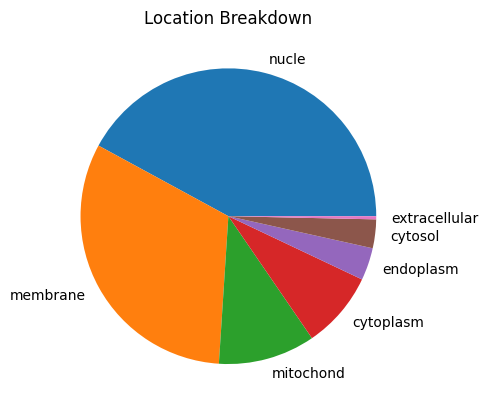

In [70]:
joined_expression.location.value_counts().plot.pie()
plt.title("Location Breakdown")
plt.ylabel("");

In [58]:
joined_expression.molecular_function.value_counts()

molecular_function      10212
ATP                      3841
transmembrane            3726
kinase                   3174
transcription            3013
RNA polymerase           1863
transporter              1426
tRNA                     1426
peptidase                 920
histone                   874
dehydrogenase             644
receptor                  575
ADP                       414
hydrolase                 368
rRNA binding              345
damage                    299
NAD+                      184
exonuclease activity      115
NADH                       92
snRNA binding              69
calcium channel            69
peptide binding            23
Name: molecular_function, dtype: int64

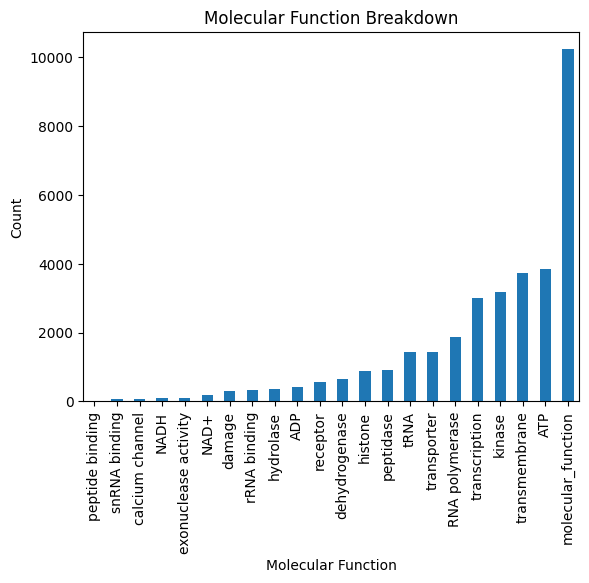

In [68]:
functions = joined_expression.molecular_function.value_counts().sort_values().plot.bar()
plt.title("Molecular Function Breakdown")
plt.xlabel("Molecular Function")
plt.ylabel("Count");